<a href="https://colab.research.google.com/github/gekaluck/bdml_wow_project/blob/main/WOW_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_ = "/content/drive/My Drive/Colab Notebooks/Big Data ML/SeoulBikeData.csv"
df = pd.read_csv(file_, encoding = 'unicode_escape') # read in csv file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data overview

In [ ]:
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

# N/A values

In [ ]:
print('N/A values')
df.isna().sum().T

N/A values


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Correlations

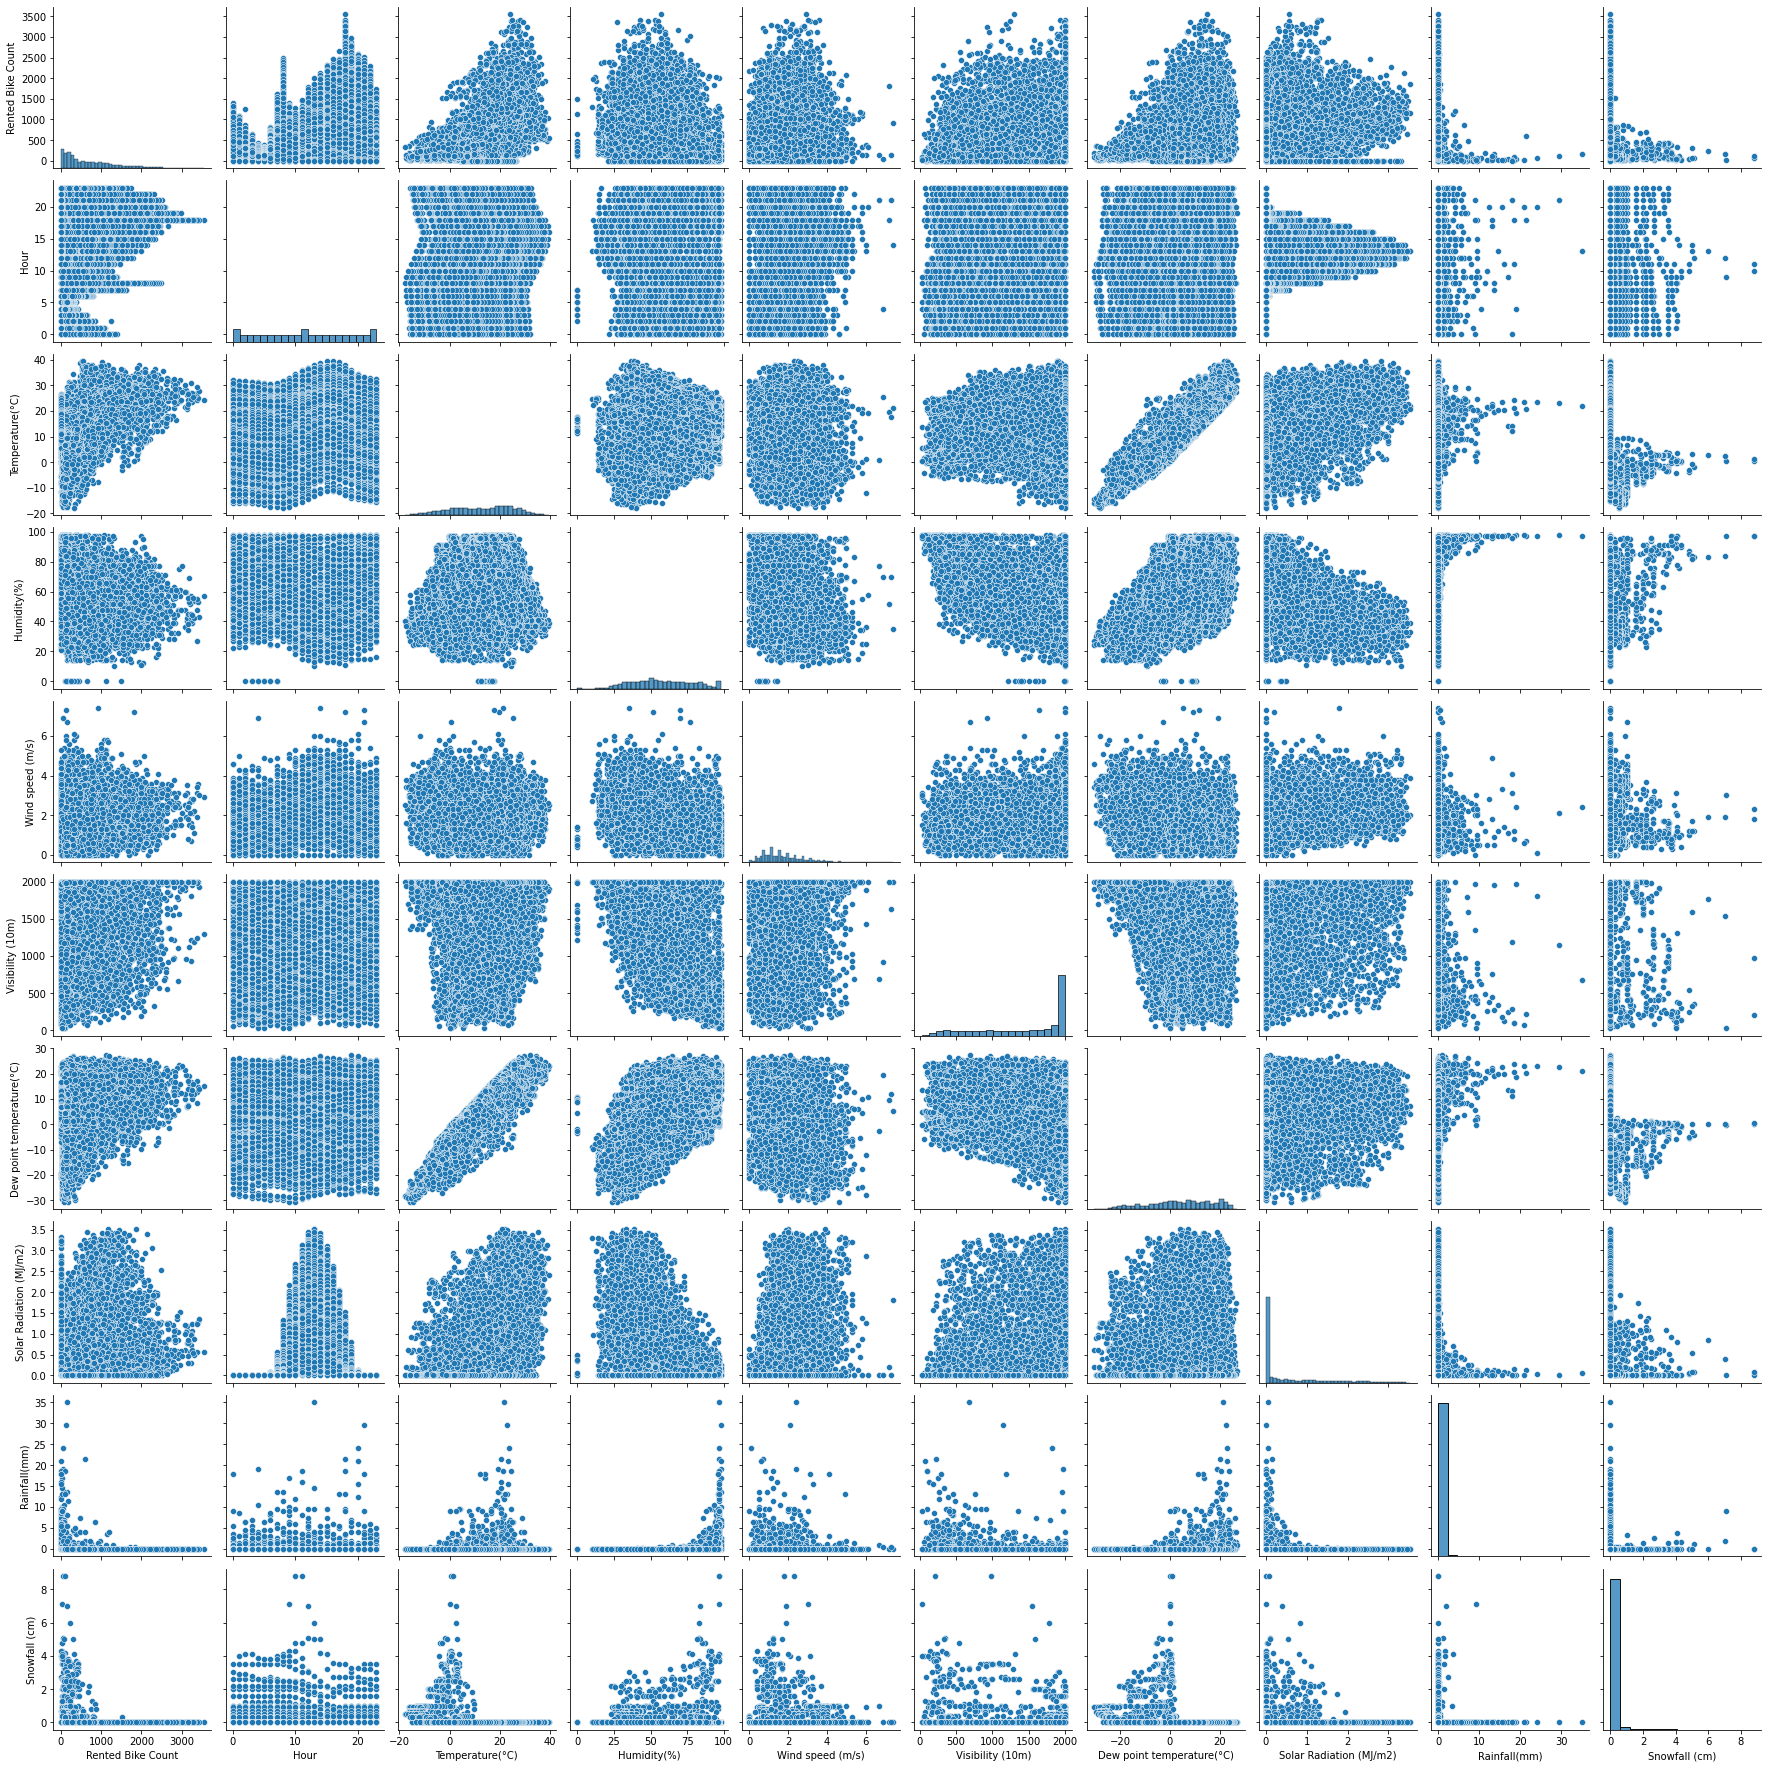

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


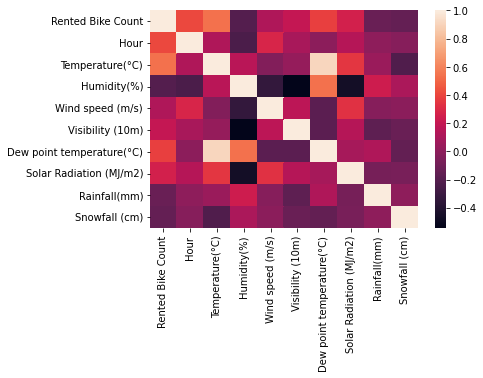

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

*Strong correlation can be seen between target variable and such features as temperature and hour of the day. Also, less significant, but still worth mentioning correlation between target variable and solar radiation. On top of that, correlation between some weather features can bee seen that make sense like humidity and visibility (negative) and dew point temperature and humidity, solar radiation and humidity (negative)*

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Bike count throughout the year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Date
2017-12-01     9539
2017-12-02     8523
2017-12-03     7222
2017-12-04     8729
2017-12-05     8307
              ...  
2018-11-26    17162
2018-11-27    16282
2018-11-28    16524
2018-11-29    16423
2018-11-30    16297
Name: Rented Bike Count, Length: 365, dtype: int64


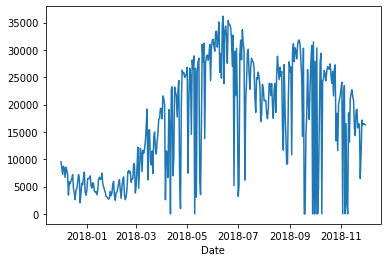

In [ ]:
agg = df.groupby('Date').sum()['Rented Bike Count']
sns.lineplot(agg.index, agg.values)
print(agg)

# Bike count distribution throughout the day

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


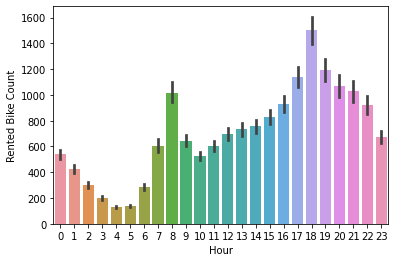

In [ ]:
sns.barplot(df['Hour'], df['Rented Bike Count'])

# Bike count during seasons

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


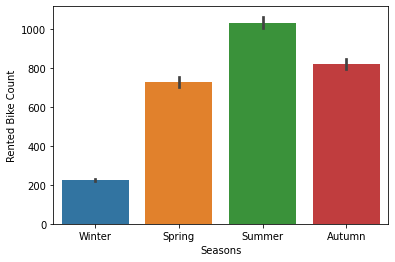

In [ ]:
sns.barplot(df['Seasons'], df['Rented Bike Count'])

# Temperature throughout the year 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


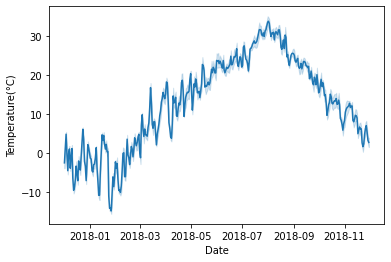

In [ ]:
sns.lineplot(df['Date'], df['Temperature(°C)'])

# Non functioning days/hours

In [ ]:
df.loc[df['Functioning Day'] == 'No']

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


# Feature engineering and transformations

Datetime

In [ ]:
df['DoW'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
print(pd.get_dummies(df).columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes', 'DoW_Friday', 'DoW_Monday', 'DoW_Saturday',
       'DoW_Sunday', 'DoW_Thursday', 'DoW_Tuesday', 'DoW_Wednesday'],
      dtype='object')


In [ ]:
mon_dict = {
    1.: 'Jan',
    2.: 'Feb',
    3.: 'Mar',
    4.: 'Apr',
    5.: 'May',
    6.: 'Jun',
    7.: 'Jul',
    8.: 'Aug',
    9.: 'Sep',
    10.: 'Oct',
    11.: 'Nov',
    12.: 'Dec'
    }
df['Month'] = df['Month'].map(mon_dict)
df = pd.get_dummies(df)

In [ ]:
print(df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes', 'DoW_Friday', 'DoW_Monday', 'DoW_Saturday',
       'DoW_Sunday', 'DoW_Thursday', 'DoW_Tuesday', 'DoW_Wednesday',
       'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan',
       'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep'],
      dtype='object')


In [ ]:
df_new = df.drop(['Rented Bike Count'], axis=1)
df_new['Rented Bike Count'] = df['Rented Bike Count']

df = df_new

print(df.head(100))

         Date  Hour  Temperature(°C)  ...  Month_Oct  Month_Sep  Rented Bike Count
0  2017-12-01     0             -5.2  ...          0          0                254
1  2017-12-01     1             -5.5  ...          0          0                204
2  2017-12-01     2             -6.0  ...          0          0                173
3  2017-12-01     3             -6.2  ...          0          0                107
4  2017-12-01     4             -6.0  ...          0          0                 78
..        ...   ...              ...  ...        ...        ...                ...
95 2017-12-04    23             -5.8  ...          0          0                248
96 2017-12-05     0             -6.1  ...          0          0                216
97 2017-12-05     1             -6.5  ...          0          0                198
98 2017-12-05     2             -6.8  ...          0          0                124
99 2017-12-05     3             -6.9  ...          0          0                 62

[10

# DELETE NON FUNCTIONAL

In [ ]:
df = df[df['Functioning Day_Yes'] == 1]
df = df.drop(['Functioning Day_Yes', 'Functioning Day_No'], axis=1)
df.shape

(8465, 36)

Split

In [ ]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:,:-1], df.iloc[:,-1]

print(X)
print(y)
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=42)
    
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

                    Date  Hour  ...  Month_Oct  Month_Sep
0    2017-12-01 00:00:00     0  ...          0          0
1    2017-12-01 01:00:00     1  ...          0          0
2    2017-12-01 02:00:00     2  ...          0          0
3    2017-12-01 03:00:00     3  ...          0          0
4    2017-12-01 04:00:00     4  ...          0          0
...                  ...   ...  ...        ...        ...
8755 2018-11-30 19:00:00    19  ...          0          0
8756 2018-11-30 20:00:00    20  ...          0          0
8757 2018-11-30 21:00:00    21  ...          0          0
8758 2018-11-30 22:00:00    22  ...          0          0
8759 2018-11-30 23:00:00    23  ...          0          0

[8465 rows x 35 columns]
0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8465, dtype: int64
(6772, 35) (1693, 35) (6772,) (1693,)


# Skewness

In [ ]:
print(df.skew(axis = 0, skipna = True))

Hour                         -0.001261
Temperature(°C)              -0.174550
Humidity(%)                   0.068649
Wind speed (m/s)              0.894222
Visibility (10m)             -0.695306
Dew point temperature(°C)    -0.338775
Solar Radiation (MJ/m2)       1.510065
Rainfall(mm)                 14.616921
Snowfall (cm)                 8.292830
Seasons_Autumn                1.291307
Seasons_Spring                1.123394
Seasons_Summer                1.089537
Seasons_Winter                1.123394
Holiday_Holiday               4.219538
Holiday_No Holiday           -4.219538
DoW_Friday                    2.021469
DoW_Monday                    1.989266
DoW_Saturday                  2.031009
DoW_Sunday                    2.021469
DoW_Thursday                  2.054468
DoW_Tuesday                   2.123020
DoW_Wednesday                 2.054468
Month_Apr                     3.042240
Month_Aug                     2.911538
Month_Dec                     2.911538
Month_Feb                

In [ ]:
import seaborn as sns
import numpy as np
import math
import scipy.stats as ss
import matplotlib.pyplot as plt

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go throug desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1.set(xlabel='Original ' + col)
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2.set(xlabel='Transformed ' + col)
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2.set(xlabel='NO TRANSFORM ' + col)
                plt.show()
                

    return DF

In [ ]:
X_train.iloc[:,:10].columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)'],
      dtype='object')

In [ ]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np

X_train_transf = X_train.iloc[:, 1:10]
X_test_transf = X_test.iloc[:, 1:10]
# X_train_transf = skew_autotransform(X_train.iloc[:, 1:10].copy(deep=True), plot = True, exp = False, threshold = 1)
# X_test_transf = skew_autotransform(X_test.iloc[:, 1:10].copy(deep=True), plot = True, exp = False, threshold = 1)

Cubic root to decrease skewness

In [ ]:
X_train_transf['Solar Radiation (MJ/m2)'] = np.power(X_train_transf['Solar Radiation (MJ/m2)'], 1/3)
X_train_transf['Rainfall(mm)'] = np.power(X_train_transf['Rainfall(mm)'], 1/3)
X_train_transf['Snowfall (cm)'] = np.power(X_train_transf['Snowfall (cm)'], 1/3)
X_test_transf['Solar Radiation (MJ/m2)'] = np.power(X_test_transf['Solar Radiation (MJ/m2)'], 1/3)
X_test_transf['Rainfall(mm)'] = np.power(X_test_transf['Rainfall(mm)'], 1/3)
X_test_transf['Snowfall (cm)'] = np.power(X_test_transf['Snowfall (cm)'], 1/3)

In [ ]:
X_train_df_new = DataFrame(X_train.iloc[:,0]).join(X_train_transf).join(X_train.iloc[:,10:])
X_test_df_new = DataFrame(X_test.iloc[:,0]).join(X_test_transf).join(X_test.iloc[:,10:])
print(X_train_df_new.shape, X_test_df_new.shape)                                                           

(6772, 35) (1693, 35)


In [ ]:
X_train_val = X_train_df_new.iloc[:,1:].values
X_test_val = X_test_df_new.iloc[:,1:].values
y_train_val = y_train.values
y_test_val = y_test.values

# Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
stdsc = StandardScaler()  

X_train_std = stdsc.fit_transform(X_train_val)
X_test_std = stdsc.transform(X_test_val)

#*3. Shapley Values*


https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [ ]:
print(X_train_df_new.columns)

Index(['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'DoW_Friday', 'DoW_Monday',
       'DoW_Saturday', 'DoW_Sunday', 'DoW_Thursday', 'DoW_Tuesday',
       'DoW_Wednesday', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')


In [ ]:
#!pip install shap
import pandas as pd
import shap
import sklearn


model = sklearn.linear_model.LinearRegression()
model.fit(X_train_df_new.iloc[:,1:], DataFrame(y_train))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
explainer = shap.Explainer(model.predict, X_test_df_new.iloc[:,1:])
shap_values = explainer(X_test_df_new.iloc[:,1:])

Permutation explainer: 1694it [01:01, 22.65it/s]                          


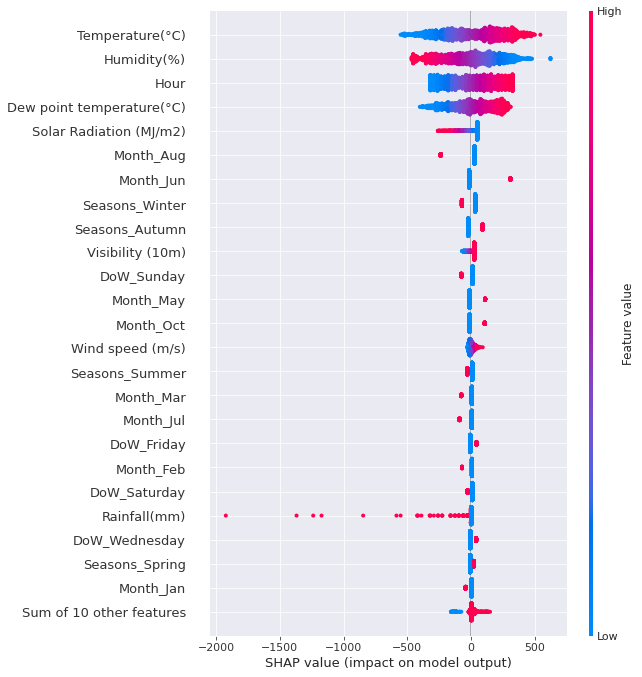

In [ ]:
shap.plots.beeswarm(shap_values, max_display=25)

# Cross validation for Regression algorithms

best min_samples_leaf: 5  with r2_score =  0.8590544677131791


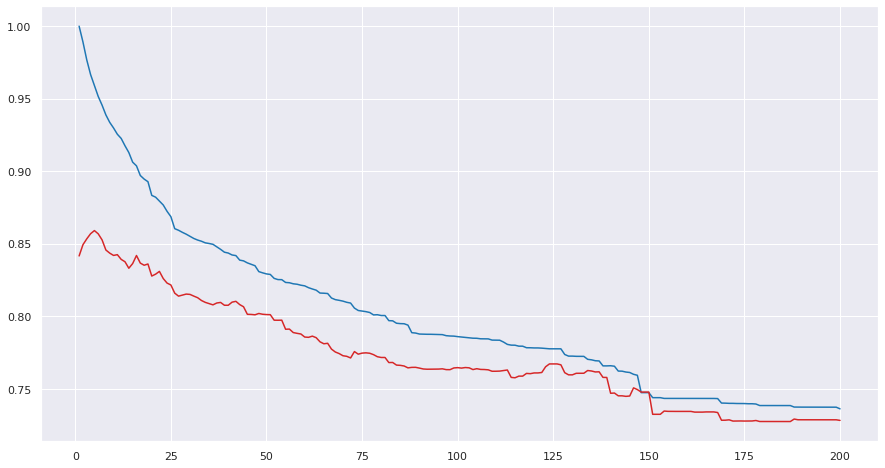

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# lets find the best min_samples_leaf with trial and error
acc_test = [] # accuracy per k (by accuracy i mean r2_score)
acc_train = []
max_r2_test = 0
best_k_test = 0
for k in range(1,201):
    rt = DecisionTreeRegressor(min_samples_leaf = k , random_state = 1)
    rt.fit(X_train_std , y_train_val)
    rt_pred_train = rt.predict(X_train_std)
    rt_pred_test = rt.predict(X_test_std)
    r2_train = metrics.r2_score(y_train_val , rt_pred_train)
    r2_test = metrics.r2_score(y_test_val , rt_pred_test)
    acc_test.append(r2_test)
    acc_train.append(r2_train)
    if r2_test > max_r2_test:
        max_r2_test = r2_test
        best_k_test = k

print("best min_samples_leaf:",best_k_test , " with r2_score = " , max_r2_test)
plt.plot(np.arange(1,201) , acc_train , color = 'tab:blue')
plt.plot(np.arange(1,201) , acc_test , color = 'tab:red')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.linear_model import Lasso, Ridge


regressors = {"LinearRegression": LinearRegression(),
              "RandomForestRegressor": RandomForestRegressor(random_state = 1),
              "Support Vector Regressor: ": SVR(kernel = 'rbf'),
              "Decision Tree Regressor: ": DecisionTreeRegressor(min_samples_leaf = 4 , random_state = 1),
              "XGBoost Regressor:": XGBRegressor(),
              "LightGBM Regressor:": LGBMRegressor(),
              "Lasso:": Lasso(max_iter = 10000),
              "Ridge:": Ridge()}

for k, v in regressors.items():
  print(k)
  scores_mse = cross_val_score(estimator=v,
                              X=X_train_val,
                              y=y_train_val,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=1)

  scores_r2 = cross_val_score(estimator=v,
                              X=X_train_val,
                              y=y_train_val,
                              cv=5,
                              scoring='r2',
                              n_jobs=1)
  print("mean MSE: ", abs(scores_mse.mean()))
  print("mean R2: ", scores_r2.mean(), "\n")

LinearRegression
mean MSE:  169433.02349401818
mean R2:  0.5940006535485797 

RandomForestRegressor
mean MSE:  31011.587414279093
mean R2:  0.9256685975359586 

Support Vector Regressor: 
mean MSE:  434982.7635303355
mean R2:  -0.04172974757531574 

Decision Tree Regressor: 
mean MSE:  54463.86855471656
mean R2:  0.8690843345009946 

XGBoost Regressor:
[21:12:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:20]

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

params = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

param_grid = [{ 
        "n_estimators": (50, 100, 500),
    "max_depth": (-1, 3, 5),
    'num_leaves': (7, 14, 21, 28, 31, 50),               
    "learning_rate": (0.005, 0.1, 0.05)
}]

reg = GridSearchCV(estimator=lgb,           
                      param_grid=param_grid, 
                      cv=3,
                      return_train_score=True) 
reg = reg.fit(X_train_std, y_train_val)
print(reg.best_score_)
print(reg.best_params_)

0.9452891415062746
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 500, 'num_leaves': 31}


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
predicted = reg.predict(X_test_std)

lgb = LGBMRegressor(learning_rate=0.1, max_depth= -1, n_estimators= 500, num_leaves= 31)

lgb.fit(X_train_std, y_train_val)

predicted = lgb.predict(X_test_std)
predicted
print(r2_score(y_test_val, predicted))
mean_squared_error(y_test_val, predicted)

0.9363797209915357


24976.453913055953

We assume negative predictions as 0. Final Metric values

In [ ]:
predicted_no_z = np.where(predicted <0 , 0, predicted)
print("R2: ", r2_score(y_test_val, predicted_no_z))
print("MSE: ", mean_squared_error(y_test_val, predicted_no_z))
print("MAE: ", mean_absolute_error(y_test_val, predicted_no_z))

R2:  0.9365705014335173
MSE:  24901.55611331457
MAE:  83.61878447187037


In [ ]:
print(predicted_no_z)

[1223.11561494 1020.10420845  973.01077582 ...  169.24232093 1080.21904108
 1575.17178985]


In [ ]:
compare_df = X_test_df_new
compare_df['Predicted'] = predicted_no_z
compare_df['Actual'] = y_test_val
compare_df['Delta'] = compare_df['Actual'] - compare_df['Predicted']

In [ ]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [ ]:
compare_df = undummify(compare_df)
compare_df.describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Predicted,Actual,Delta
count,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000
mean,11.619610,12.683934,57.461902,1.723981,1450.600709,3.705198,0.467730,0.060702,0.057071,726.725281,720.223272,-6.502008
std,7.011432,12.312889,20.223263,1.023935,600.973618,13.416631,0.524160,0.285953,0.244534,613.840757,626.752254,157.714845
min,0.000000,-16.900000,0.000000,0.000000,70.000000,-29.700000,0.000000,0.000000,0.000000,0.000000,3.000000,-2043.276654
25%,5.000000,2.800000,42.000000,1.000000,967.000000,-5.700000,0.000000,0.000000,0.000000,226.018066,216.000000,-45.223893
50%,12.000000,13.300000,56.000000,1.500000,1719.000000,4.200000,0.215443,0.000000,0.000000,562.123379,542.000000,-0.310314
75%,18.000000,22.800000,73.000000,2.300000,2000.000000,15.300000,0.976100,0.000000,0.000000,1079.835669,1088.000000,43.319547
max,23.000000,39.400000,98.000000,6.900000,2000.000000,26.800000,1.497774,3.089873,1.600521,3153.775413,3365.000000,1350.048024


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


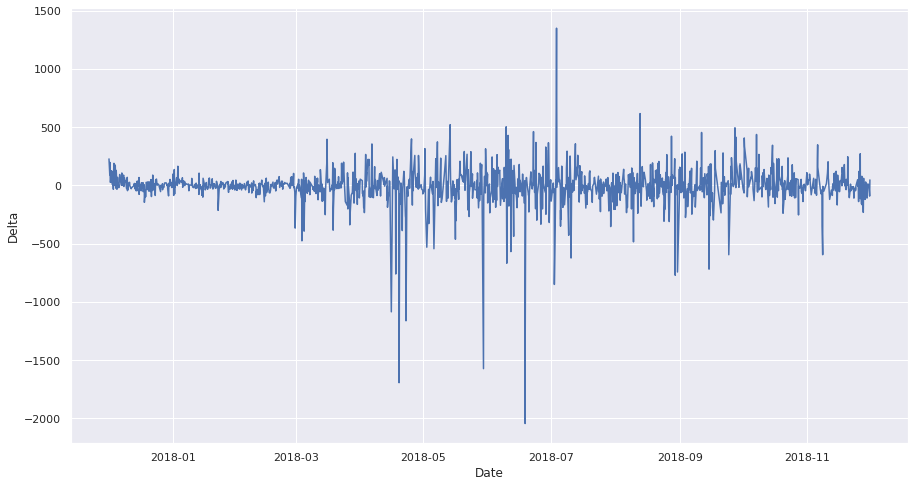

In [ ]:
import seaborn as sns

sns.lineplot(compare_df['Date'], compare_df['Delta']) 


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


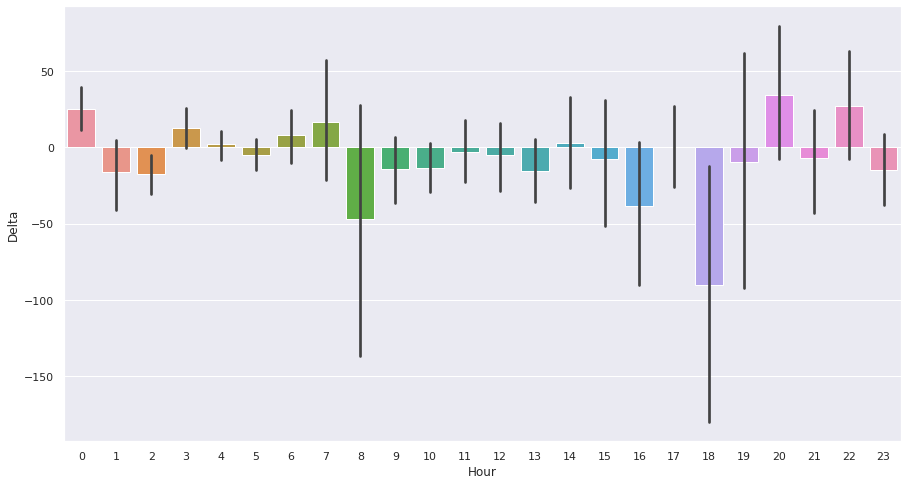

In [ ]:
sns.barplot(compare_df['Hour'], compare_df['Delta'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


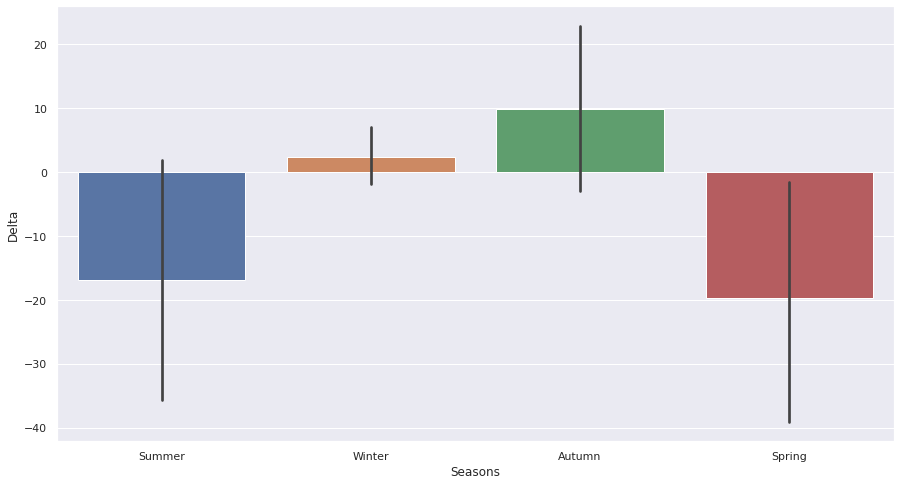

In [ ]:
sns.barplot(compare_df['Seasons'], compare_df['Delta'])

Group by Day

In [ ]:
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.lineplot(compare_df['Date'], compare_df['Actual'])
gb = compare_df.groupby(df['Date'].dt.date).sum()
print(gb)

            Hour  Temperature(°C)  Humidity(%)  ...    Predicted  Actual       Delta
Date                                            ...                                 
2017-12-01    67             -8.1          256  ...  1864.185293    2408  543.814707
2017-12-02    48              1.8          322  ...  1583.549457    1914  330.450543
2017-12-03    74             36.5          639  ...  1944.791787    2397  452.208213
2017-12-04    94             -9.7          368  ...  2606.935730    3175  568.064270
2017-12-05    51            -32.6          214  ...  1234.457785    1356  121.542215
...          ...              ...          ...  ...          ...     ...         ...
2018-11-26    86             52.9          746  ...  6064.686753    5755 -309.686753
2018-11-27    87             44.5          335  ...  4547.618123    4035 -512.618123
2018-11-28    71             36.6          142  ...  4402.042779    4264 -138.042779
2018-11-29    54             21.5          125  ...  2942.081136 

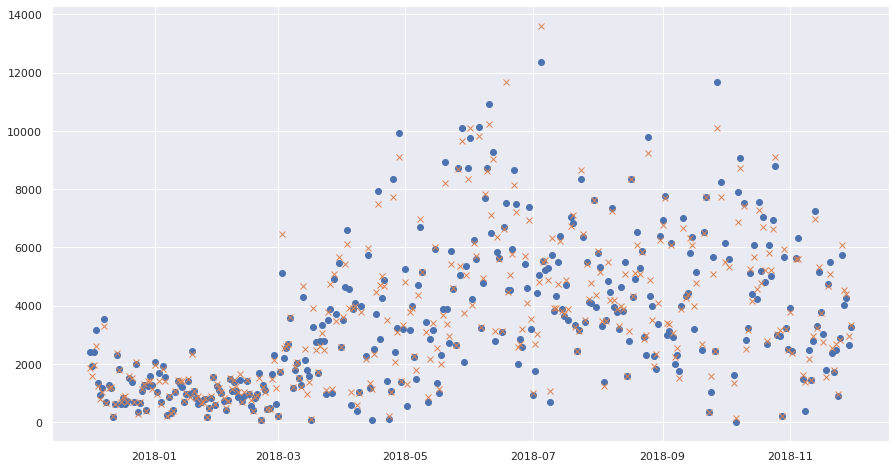

In [ ]:
import matplotlib.pyplot as plt
plt.plot(gb.index, gb['Actual'], linestyle="",marker="o")
plt.plot(gb.index, gb['Predicted'],linestyle="",marker="x")

Absolute errors

In [ ]:
compare_df['Delta'].abs().describe()

count    1693.000000
mean       83.618784
std       133.865753
min         0.001555
25%        17.752624
50%        44.594643
75%       101.015707
max      2043.276654
Name: Delta, dtype: float64